In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#generowanie danych
np.random.seed(42)
data_size=100

data = {
    "Date":pd.date_range(start="2023-01-01",periods=data_size,freq="D"),
    "Temperature":np.random.normal(15,5,data_size), #średnia temperatura
    "Rainfall":np.random.exponential(2,data_size), #ilość opadów
    "WindSpeed":np.random.uniform(0,15,data_size), #prędkość wiatru
}

df = pd.DataFrame(data)
csv_file_path = "wather_data.csv"
df.to_csv(csv_file_path)

In [7]:
#przetwarzanie danych: obliczanie tygodniowych średnich wartości
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date",inplace=True)
weekly_data = df.resample("W").mean()

In [8]:
#normalizacja temperatur w zakresie [0,1]
normalized_temps = (weekly_data["Temperature"] - weekly_data["Temperature"].min())/(weekly_data["Temperature"].max() - weekly_data["Temperature"].min())

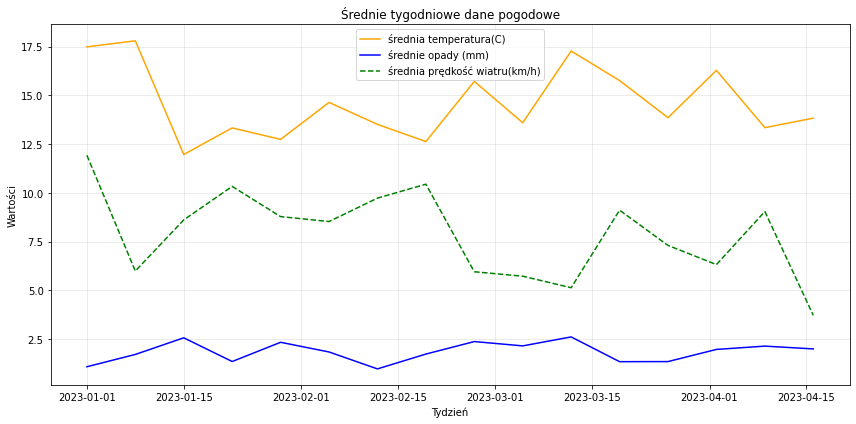

In [9]:
#wykres temperatury, opadów i pręd wiatrów
plt.figure(figsize=(12,6))

plt.plot(weekly_data.index,weekly_data["Temperature"],label = "średnia temperatura(C)",color="orange")
plt.plot(weekly_data.index,weekly_data["Rainfall"],label = "średnie opady (mm)",color="blue")
plt.plot(weekly_data.index,weekly_data["WindSpeed"],label = "średnia prędkość wiatru(km/h)",color="green",linestyle="--")

plt.title("Średnie tygodniowe dane pogodowe")
plt.xlabel("Tydzień")
plt.ylabel("Wartości")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()